## 2. Preprocessing and Performance: Detecting ExoPlanets

**Objective**: Utilize data from the **K2 Kepler mission** (which concluded in 2018) to develop a machine learning model that assists in classifying celestial bodies and determining their exoplanet status. An exoplanet is defined as "A planet that orbits a star outside the solar system".

**Background**: The Kepler Mission was strategically devised to survey a segment of the Milky Way galaxy. Its primary goal was to identify Earth-sized or smaller planets situated in or near the habitable zone. This would further help in estimating the fraction of stars in our galaxy that might host such planets (_Nasa.gov, 2018_). The assignment itself is based almost completely on a previous student project from MAL 2022 submitted by Pavel Balan and Alex Vasilianov.

**Data Source**: The dataset is provided by the NASA Exoplanet Archive, NASA Exoplanet Science Institute [here](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=koi). There are several datasets available, all from differet periods, but we will use the __Cumulative KOI Data__ dataset.

The cumulative KOI (Kepler Objects of interest) table gathers information from the individual KOI activity tables that describe the current results of different searches of the Kepler light curves. The intent of the cumulative table is to provide the most accurate dispositions and stellar and planetary information for all KOIs in one place. All the information in this table has provenance in other KOI activity tables (_exoplanetarchive.ipac.caltech.edu, 2018_).

The data has been locally downloaded and saved as `exoplanet_dataset.csv`.


#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, or other anomalies.
3. Choose appropriate machine learning algorithms for the classification task.
4. Train and validate your model, ensuring to avoid overfitting.
5. Evaluate the model's performance using relevant metrics.

Below some guidelines are given but the assignment is relatively "free".

Best of luck with your analysis!


1. Explore the dataset to understand the features and their distributions.

In [1]:
import pandas as pd

exoplanet_df = pd.read_csv('../data/exoplanet_dataset.csv')

print(exoplanet_df.shape, "- 9564 rows with 49 features")

pd.set_option('display.max_columns', None)
exoplanet_df

(9564, 49) - 9564 rows with 49 features


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,NaN,NaN,4500.53,3406.38,-1175.26,453.3,1.0,q1_q17_dr25_tce,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,NaN,NaN,1585.81,1537.86,-502.22,10.6,1.0,q1_q17_dr25_tce,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,NaN,NaN,5713.41,5675.74,-1836.94,12.3,1.0,q1_q17_dr25_tce,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,333.486169,4.235000e-03,-4.235000e-03,153.615010,0.005070,-0.005070,0.214,0.255,-0.214,3.19900,0.22900,-0.22900,639.1,52.7,-52.7,19.30,0.55,-4.68,557.0,NaN,NaN,22.68,2.07,-10.95,14.0,1.0,q1_q17_dr25_tce,4989.0,39.0,-128.0,2.992,0.030,-0.0

In [2]:
# For an easier comprehension, we will rename the columns into their description.

exoplanet_df = exoplanet_df.rename(columns={
    'kepid':'KepID',
    'kepoi_name':'KOIName',
    'kepler_name':'KeplerName',
    'koi_disposition':'ExoplanetArchiveDisposition',
    'koi_pdisposition':'DispositionUsingKeplerData',
    'koi_score':'DispositionScore',
    'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
    'koi_fpflag_ss':'koi_fpflag_ss',
    'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
    'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
    'koi_period':'OrbitalPeriod, days',
    'koi_period_err1':'OrbitalPeriodUpperUnc, days',
    'koi_period_err2':'OrbitalPeriodLowerUnc, days',
    'koi_time0bk':'TransitEpoch, BKJD',
    'koi_time0bk_err1':'TransitEpochUpperUnc, BKJD',
    'koi_time0bk_err2':'TransitEpochLowerUnc, BKJD',
    'koi_impact':'ImpactParamete',
    'koi_impact_err1':'ImpactParameterUpperUnc',
    'koi_impact_err2':'ImpactParameterLowerUnc',
    'koi_duration':'TransitDuration, hrs',
    'koi_duration_err1':'TransitDurationUpperUnc, hrs',
    'koi_duration_err2':'TransitDurationLowerUnc, hrs',
    'koi_depth':'TransitDepth, ppm',
    'koi_insol':'InsolationFlux, Earthflux',
    'koi_insol_err1':'InsolationFluxUpperUnc, Earthflux',
    'koi_insol_err2':'InsolationFluxLowerUnc, Earthflux',
    'koi_model_snr':'TransitSignal-to-Noise',
    'koi_tce_plnt_num':'TCEPlanetNumber',
    'koi_tce_delivname':'TCEDeliver',
    'koi_steff':'StellarEffectiveTemperature, K',
    'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc, K',
    'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc, K',
    'koi_depth_err1':'TransitDepthUpperUnc, ppm',
    'koi_depth_err2':'TransitDepthLowerUnc, ppm',
    'koi_prad':'PlanetaryRadius, Earthradii',
    'koi_prad_err1':'PlanetaryRadiusUpperUnc, Earthradii',
    'koi_prad_err2':'PlanetaryRadiusLowerUnc, Earthradii',
    'koi_teq':'EquilibriumTemperature, K',
    'koi_teq_err1':'EquilibriumTemperatureUpperUnc, K',
    'koi_teq_err2':'EquilibriumTemperatureLowerUnc, K',
    'koi_slogg':'StellarSurfaceGravity, log10(cm/s^2)',
    'koi_slogg_err1':'StellarSurfaceGravityUpperUnc, log10(cm/s^2)',
    'koi_slogg_err2':'StellarSurfaceGravityLowerUnc, log10(cm/s^2)',
    'koi_srad':'StellarRadius, Solarradii',
    'koi_srad_err1':'StellarRadiusUpperUnc, Solarradii',
    'koi_srad_err2':'StellarRadiusLowerUnc, Solarradii',
    'ra':'RA, decimaldegrees',
    'dec':'Dec, decimaldegrees',
    'koi_kepmag':'Kepler-band, mag'
})
exoplanet_df




,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","OrbitalPeriodLowerUnc, days","TransitEpoch, BKJD","TransitEpochUpperUnc, BKJD","TransitEpochLowerUnc, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDurationUpperUnc, hrs","TransitDurationLowerUnc, hrs","TransitDepth, ppm","TransitDepthUpperUnc, ppm","TransitDepthLowerUnc, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","EquilibriumTemperatureUpperUnc, K","EquilibriumTemperatureLowerUnc, K","InsolationFlux, Earthflux","InsolationFluxUpperUnc, Earthflux","InsolationFluxLowerUnc, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,TCEDeliver,"StellarEffectiveTemperature, K","StellarEffectiveTemperatureUpperUnc, K","StellarEffectiveTemperatureLowerUnc, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","StellarRadius, Solarradii","StellarRadiusUpperUnc, Solarradii","StellarRadiusLowerUnc, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,NaN,NaN,4500.53,3406.38,-1175.26,453.3,1.0,q1_q17_dr25_tce,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,NaN,NaN,1585.81,1537.86,-502.22,10.6,1.0,q1_q17_dr25_tce,6119.0,165.0,

In [3]:
exoplanet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2673 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

In [4]:
exoplanet_df.describe()

# The presence of outliers or extremely large ranges in some features (like koi_period) suggests that further investigation into these variables 
# may be necessary, possibly including log transformations or outlier handling.



,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","OrbitalPeriodLowerUnc, days","TransitEpoch, BKJD","TransitEpochUpperUnc, BKJD","TransitEpochLowerUnc, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDurationUpperUnc, hrs","TransitDurationLowerUnc, hrs","TransitDepth, ppm","TransitDepthUpperUnc, ppm","TransitDepthLowerUnc, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","EquilibriumTemperatureUpperUnc, K","EquilibriumTemperatureLowerUnc, K","InsolationFlux, Earthflux","InsolationFluxUpperUnc, Earthflux","InsolationFluxLowerUnc, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,"StellarEffectiveTemperature, K","StellarEffectiveTemperatureUpperUnc, K","StellarEffectiveTemperatureLowerUnc, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","StellarRadius, Solarradii","StellarRadiusUpperUnc, Solarradii","StellarRadiusLowerUnc, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,9110.000000,9110.000000,9201.000000,9110.000000,9110.000000,9564.000000,9110.000000,9110.000000,9.201000e+03,9110.000000,9110.000000,9201.000000,9201.000000,9201.000000,9201.000000,0.0,0.0,9.243000e+03,9.243000e+03,9.243000e+03,9201.000000,9218.000000,9201.000000,9096.000000,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,0.009933,-0.009933,0.735105,1.959861,-0.332557,5.621606,0.339942,-0.339942,2.379134e+04,123.197563,-123.197563,102.891778,17.657684,-33.023314,1085.385828,NaN,NaN,7.745737e+03,3.750698e+03,-4.043522e+03,259.895001,1.243654,5706.823280,144.635554,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008236,0.008236,67.918960,0.023097,0.023097,3.348832,9.421653,1.249828,6.471554,0.669823,0.669823,8.224268e+04,4112.615230,4112.615230,3077.639126,391.138501,1193.519910,856.351161,NaN,NaN,1.592047e+05,5.504421e+04,8.838831e+04,795.806615,0.664573,796.857947,47.052305,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.052000,0.000000,-20.200000,0.000000e+00,0.000000,-388600.000000,0.080000,0.000000,-77180.000000,25.000000,NaN,NaN,0.000000e+00,0.000000e+00,-5.600031e+06,0.000000,1.000000,2661.000000,0.000000,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,0.001240,-0.010500,0.197000,0.040000,-0.445000,2.437750,0.050800,-0.350000,1.599000e+02,9.600000,-49.500000,1.400000,0.230000,-1.940000,539.000000,NaN,NaN,2.015000e+01,9.190000e+00,-2.873100e+02,12.000000,1.000000,5310.000000,106.000000,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,0.004130,-0.004130,0.537000,0.193000,-0.207000,3.792600,0.142000,-0.142000,4.211000e+02,20.750000,-20.750000,2.390000,0.520000,-0.300000,878.000000,NaN,NaN,1.416000e+02,7.283000e+01,-4.026000e+01,23.000000,1.000000,5767.000000,157.000000,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261

DispositionUsingKeplerData
FALSE POSITIVE    4847
CANDIDATE         4717
Name: count, dtype: int64


/Users/jaa/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jaa/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jaa/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


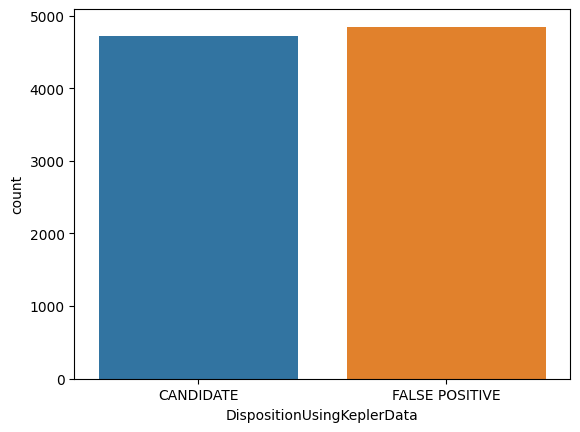

In [5]:
import seaborn as sns
sns.countplot(x = exoplanet_df['DispositionUsingKeplerData'])
print(exoplanet_df['DispositionUsingKeplerData'].value_counts())

/Users/jaa/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jaa/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jaa/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


ExoplanetArchiveDisposition
FALSE POSITIVE    4839
CONFIRMED         2671
CANDIDATE         2054
Name: count, dtype: int64


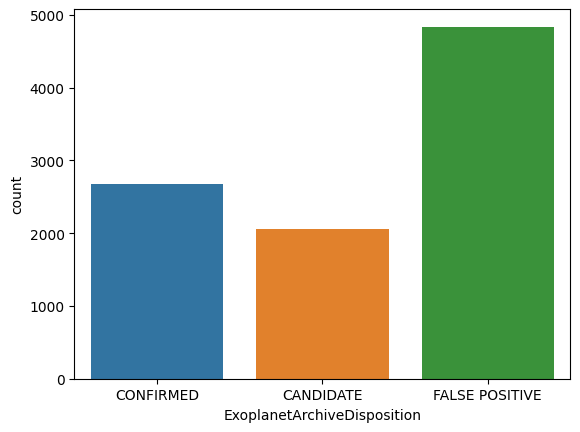

In [6]:
sns.countplot(x= exoplanet_df['ExoplanetArchiveDisposition'])
print(exoplanet_df['ExoplanetArchiveDisposition'].value_counts())

In [7]:
# Check the distribution of unique values in categorical columns
categorical_columns = exoplanet_df.select_dtypes(include=['object']).columns

# Display the value counts for each categorical column
{column: exoplanet_df[column].value_counts() for column in categorical_columns}

{'KOIName': KOIName
 K00752.01    1
 K04976.01    1
 K04978.01    1
 K04979.01    1
 K04980.01    1
             ..
 K00552.01    1
 K00601.01    1
 K00601.02    1
 K00601.03    1
 K07989.01    1
 Name: count, Length: 9564, dtype: int64,
 'KeplerName': KeplerName
 Kepler-227 b     1
 Kepler-132 d     1
 Kepler-1439 b    1
 Kepler-1440 b    1
 Kepler-414 c     1
                 ..
 Kepler-981 b     1
 Kepler-982 b     1
 Kepler-335 b     1
 Kepler-336 d     1
 Kepler-1975 b    1
 Name: count, Length: 2673, dtype: int64,
 'ExoplanetArchiveDisposition': ExoplanetArchiveDisposition
 FALSE POSITIVE    4839
 CONFIRMED         2671
 CANDIDATE         2054
 Name: count, dtype: int64,
 'DispositionUsingKeplerData': DispositionUsingKeplerData
 FALSE POSITIVE    4847
 CANDIDATE         4717
 Name: count, dtype: int64,
 'TCEDeliver': TCEDeliver
 q1_q17_dr25_tce    8054
 q1_q16_tce          796
 q1_q17_dr24_tce     368
 Name: count, dtype: int64}

2. Preprocess the data, handling any missing values, outliers, or other anomalies.

In [8]:
# Let's start with Step 1: Handle Missing Values.

# Calculate the percentage of missing values for each column
missing_values_percent = exoplanet_df.isnull().mean() * 100

# Display columns with missing values in descending order of missing percentage
missing_values_percent[missing_values_percent > 0].sort_values(ascending=True)


## column name -- missing percentage
missing_values_percent

KepID                                                      0.000000
KOIName                                                    0.000000
KeplerName                                                72.051443
ExoplanetArchiveDisposition                                0.000000
DispositionUsingKeplerData                                 0.000000
DispositionScore                                          15.788373
NotTransit-LikeFalsePositiveFlag                           0.000000
koi_fpflag_ss                                              0.000000
CentroidOffsetFalsePositiveFlag                            0.000000
EphemerisMatchIndicatesContaminationFalsePositiveFlag      0.000000
OrbitalPeriod, days                                        0.000000
OrbitalPeriodUpperUnc, days                                4.746968
OrbitalPeriodLowerUnc, days                                4.746968
TransitEpoch, BKJD                                         0.000000
TransitEpochUpperUnc, BKJD                      

In [9]:
# Drop Columns with Excessive Missingness
exoplanet_df.drop(columns=['EquilibriumTemperatureUpperUnc, K', 'EquilibriumTemperatureLowerUnc, K'], inplace=True)

### keplerName wont be a feature so we can leave it as is


### consider:
DispositionScore - if important for analysis, we should consider imputation (replacing missing with median or mean, or with more sophisticated method such as model based imputation e.g. KNN imputation)

(same for all values around ~5%)
StellarEffectiveTemperatureLowerUnc, K 
StellarRadiusLowerUnc, Solarradii 
StellarRadiusUpperUnc, Solarradii 
StellarSurfaceGravityLowerUnc, log10(cm/s^2)
StellarSurfaceGravityUpperUnc, log10(cm/s^2)
StellarEffectiveTemperatureUpperUnc, K 
OrbitalPeriodLowerUnc, days 
TransitDepthLowerUnc, ppm 
TransitEpochUpperUnc, BKJD 
OrbitalPeriodUpperUnc, days 
ImpactParameterLowerUnc 
TransitDepthUpperUnc, ppm 
TransitEpochLowerUnc, BKJD 
ImpactParameterUpperUnc 
TransitDurationLowerUnc, hrs 
TransitDurationUpperUnc, hrs 

### collumns around ~3-4% same as above

Since Kepler-band, mag has a very small percentage of missing values (0.01%)
-- we can replace with mean or median since the impact will be small


TCEPlanetNumber
TCEDeliver

In [10]:
# handle missing values - imputation
import numpy as np
from sklearn.impute import SimpleImputer

# We will separate the numeric and non-numeric columns to handle imputation correctly
numeric_cols = exoplanet_df.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = exoplanet_df.select_dtypes(exclude=[np.number]).columns.tolist()

excluded_id_cols = ['TCEPlanetNumber', 'KepID']
numeric_cols = [col for col in numeric_cols if col not in excluded_id_cols]

# Check which numeric columns have missing values for imputation
numeric_cols_missing = exoplanet_df[numeric_cols].isnull().mean() * 100
numeric_cols_to_impute = numeric_cols_missing[
    (numeric_cols_missing > 0) 
].index.tolist()

# Impute the missing values in numeric columns
imputer = SimpleImputer(strategy='median')
exoplanet_df[numeric_cols_to_impute] = imputer.fit_transform(exoplanet_df[numeric_cols_to_impute])

exoplanet_df[excluded_id_cols] = exoplanet_df[excluded_id_cols].fillna(-1)

# Confirm that there are no more missing values in the numeric columns
exoplanet_df[numeric_cols].isnull().sum().sort_values()


DispositionScore                                         0
PlanetaryRadiusLowerUnc, Earthradii                      0
EquilibriumTemperature, K                                0
InsolationFlux, Earthflux                                0
InsolationFluxUpperUnc, Earthflux                        0
InsolationFluxLowerUnc, Earthflux                        0
TransitSignal-to-Noise                                   0
StellarEffectiveTemperature, K                           0
PlanetaryRadiusUpperUnc, Earthradii                      0
StellarEffectiveTemperatureUpperUnc, K                   0
StellarSurfaceGravity, log10(cm/s^2)                     0
StellarSurfaceGravityUpperUnc, log10(cm/s^2)             0
StellarSurfaceGravityLowerUnc, log10(cm/s^2)             0
StellarRadius, Solarradii                                0
StellarRadiusUpperUnc, Solarradii                        0
StellarRadiusLowerUnc, Solarradii                        0
RA, decimaldegrees                                      

Imputation succesfull as we have no missing values

In [11]:
# to recheck the data, check the differences
exoplanet_df.describe()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","OrbitalPeriodLowerUnc, days","TransitEpoch, BKJD","TransitEpochUpperUnc, BKJD","TransitEpochLowerUnc, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDurationUpperUnc, hrs","TransitDurationLowerUnc, hrs","TransitDepth, ppm","TransitDepthUpperUnc, ppm","TransitDepthLowerUnc, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","InsolationFlux, Earthflux","InsolationFluxUpperUnc, Earthflux","InsolationFluxLowerUnc, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,"StellarEffectiveTemperature, K","StellarEffectiveTemperatureUpperUnc, K","StellarEffectiveTemperatureLowerUnc, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","StellarRadius, Solarradii","StellarRadiusUpperUnc, Solarradii","StellarRadiusLowerUnc, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"
count,9.564000e+03,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9.564000e+03,9564.00000,9564.00000,9564.000000,9564.000000,9564.000000,9564.000000,9.564000e+03,9.564000e+03,9.564000e+03,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000
mean,7.690628e+06,0.457647,0.208595,0.232748,0.197512,0.120033,75.671358,0.002048,-0.002048,166.183251,0.009657,-0.009657,0.727586,1.875988,-0.326597,5.621606,0.330545,-0.330545,2.290432e+04,118.33441,-118.33441,99.077250,17.007226,-31.781306,1077.514534,7.490517e+03,3.627256e+03,-3.909159e+03,250.903691,1.162484,5709.107277,145.240590,-162.150669,4.315009,0.118255,-0.142419,1.701053,0.356846,-0.380918,292.060163,43.810433,14.264633
std,2.653459e+06,0.440921,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008051,0.008051,67.918960,0.022576,0.022576,3.284876,9.202962,1.220092,6.471554,0.655084,0.655084,8.079020e+04,4013.86489,4013.86489,3018.723391,383.657088,1170.665177,840.875323,1.565158e+05,5.411655e+04,8.689518e+04,781.868222,0.775386,781.672343,45.963995,70.887176,0.425019,0.130007,0.083423,6.011383,0.908124,2.115380,4.766657,3.601243,1.385378
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.052000,0.000000,-20.200000,0.000000e+00,0.00000,-388600.00000,0.080000,0.000000,-77180.000000,25.000000,0.000000e+00,0.000000e+00,-5.600031e+06,0.000000,-1.000000,2661.000000,0.000000,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000006,-0.000245,132.761718,0.001338,-0.010000,0.209075,0.044000,-0.433000,2.437750,0.054375,-0.332000,1.668000e+02,10.10000,-47.10000,1.430000,0.240000,-1.760000,553.000000,2.216000e+01,1.012750e+01,-2.641350e+02,12.300000,1.000000,5333.000000,108.000000,-195.000000,4.232750,0.044750,-0.195000,0.835750,0.137000,-0.232000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,0.004130,-0.004130,0.537000,0.193000,-0.207000,3.792600,0.142000,-0.142000,4.211000e+02,20.75000,-20.75000,2.390000,0.520000,-0.300000,878.000000,1.416000e+02,7.283000e+01,-4.026000e+01,23.000000,1.000000,5767.000000,157.000000,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.995000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000245,-0.000006,170.694603,0.010

After imputation we handle outliers which there were few.
we're gonna use Interquartile Range (IQR) 

In [12]:
def outlier_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Apply the function to all numerical columns and store the results
outlier_indices = {}

for column in exoplanet_df.select_dtypes(include=['float64']).columns:
    lower_bound, upper_bound = outlier_bounds(exoplanet_df[column])
    outliers = exoplanet_df[(exoplanet_df[column] < lower_bound) | (exoplanet_df[column] > upper_bound)]
    outlier_indices[column] = outliers.index

# Create a DataFrame to show the number of outliers for each column
outlier_counts = {col: len(idx) for col, idx in outlier_indices.items()}
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count']).sort_values(by='Outlier Count', ascending=False)

# Display the outlier counts DataFrame
outlier_counts_df

,Column,Outlier Count
13,"TransitDepth, ppm",1834
17,"PlanetaryRadiusUpperUnc, Earthradii",1821
24,TCEPlanetNumber,1819
2,"OrbitalPeriodUpperUnc, days",1703
3,"OrbitalPeriodLowerUnc, days",1703
23,TransitSignal-to-Noise,1673
16,"PlanetaryRadius, Earthradii",1618
21,"InsolationFluxUpperUnc, Earthflux",1594
1,"OrbitalPeriod, days",1567
22,"InsolationFluxLowerUnc, Earthflux",1551


In [13]:
 # Calculate the 95th percentile for the upper and lower uncertainty of planetary radius
prad_upper_unc_95th = exoplanet_df['PlanetaryRadiusUpperUnc, Earthradii'].quantile(0.95)
prad_lower_unc_95th = exoplanet_df['PlanetaryRadiusLowerUnc, Earthradii'].quantile(0.95)

# Determine how many outliers are above the 95th percentile
upper_unc_outliers = exoplanet_df[exoplanet_df['PlanetaryRadiusUpperUnc, Earthradii'] > prad_upper_unc_95th]
lower_unc_outliers = exoplanet_df[exoplanet_df['PlanetaryRadiusLowerUnc, Earthradii'] > prad_lower_unc_95th]

# Count the number of outliers that would be affected by capping
upper_unc_outliers_count = upper_unc_outliers.shape[0]
lower_unc_outliers_count = lower_unc_outliers.shape[0]

prad_upper_unc_95th, prad_lower_unc_95th, upper_unc_outliers_count, lower_unc_outliers_count


(21.838500000000003, -0.06, 479, 438)

In [14]:
# Define a function to identify outliers based on the 95th percentile
def identify_dual_outliers(df, col_upper, col_lower, percentile=0.95):
    upper_bound = df[col_upper].quantile(percentile)
    lower_bound = df[col_lower].quantile(percentile)
    dual_outliers = df[(df[col_upper] > upper_bound) & (df[col_lower] > lower_bound)]
    return dual_outliers


# Identify entries with outliers in both upper and lower uncertainty at the 75th percentile (Q3)
dual_outliers_75th = identify_dual_outliers(
    exoplanet_df,
    'PlanetaryRadiusUpperUnc, Earthradii',
    'PlanetaryRadiusLowerUnc, Earthradii',
    percentile=0.75
)

# Get the number of such entries
dual_outliers_75th_count = dual_outliers_75th.shape[0]
dual_outliers_75th_count

3

In [15]:
# Display the 3 entries that have outliers in both upper and lower uncertainty at the 75th percentile
dual_outliers_75th_full = dual_outliers_75th
dual_outliers_75th_full


,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","OrbitalPeriodLowerUnc, days","TransitEpoch, BKJD","TransitEpochUpperUnc, BKJD","TransitEpochLowerUnc, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDurationUpperUnc, hrs","TransitDurationLowerUnc, hrs","TransitDepth, ppm","TransitDepthUpperUnc, ppm","TransitDepthLowerUnc, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","InsolationFlux, Earthflux","InsolationFluxUpperUnc, Earthflux","InsolationFluxLowerUnc, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,TCEDeliver,"StellarEffectiveTemperature, K","StellarEffectiveTemperatureUpperUnc, K","StellarEffectiveTemperatureLowerUnc, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","StellarRadius, Solarradii","StellarRadiusUpperUnc, Solarradii","StellarRadiusLowerUnc, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"
6543,9292100,K05652.01,NaN,CANDIDATE,CANDIDATE,0.334,0,0,0,0,91.507044,0.001381,-0.001381,184.2723,0.0132,-0.0132,0.1665,0.2766,-0.1665,5.019,0.326,-0.326,539.0,56.1,-56.1,1.43,5.41,-0.11,302.0,1.97,49.96,-0.48,12.4,1.0,q1_q16_tce,5040.0,183.0,-143.0,4.635,0.056,-1.207,0.626,2.363,-0.050,296.05667,45.769760,14.969
6917,9137257,K05621.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.334,1,0,0,0,114.734287,0.002841,-0.002841,231.5017,0.0182,-0.0182,0.3694,0.1129,-0.3692,3.724,0.604,-0.604,242.9,45.1,-45.1,1.10,2.47,-0.11,296.0,1.82,19.61,-0.49,6.7,1.0,q1_q16_tce,5083.0,147.0,-129.0,4.569,0.066,-0.941,0.710,1.592,-0.070,283.03592,45.577709,14.259
8439,6367439,K06695.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.334,0,1,0,1,3.778937,0.000175,-0.000175,132.1163,0.0458,-0.0458,0.6778,0.2191,-0.4516,10.767,0.800,-0.800,56.0,4.3,-4.3,0.48,2.07,-0.04,860.0,129.06,4141.96,-30.37,15.1,1.0,q1_q17_dr24_tce,5017.0,194.0,-145.0,4.653,0.053,-0.053,0.605,2.621,-0.044,292.92783,41.786160,13.548


In [16]:
# then i had the idea to make a relative uncertainty because of course the uncertainty matters relatively

# Calculate the relative upper and lower uncertainties
exoplanet_df['RelativePlanetaryRadiusUpperUnc'] = exoplanet_df['PlanetaryRadiusUpperUnc, Earthradii'] / exoplanet_df['PlanetaryRadius, Earthradii']
exoplanet_df['RelativePlanetaryRadiusLowerUnc'] = abs(exoplanet_df['PlanetaryRadiusLowerUnc, Earthradii']) / exoplanet_df['PlanetaryRadius, Earthradii']

# Select the relevant columns to display
relative_uncertainty_df = exoplanet_df[['PlanetaryRadius, Earthradii', 'PlanetaryRadiusUpperUnc, Earthradii', 'PlanetaryRadiusLowerUnc, Earthradii', 
                                        'RelativePlanetaryRadiusUpperUnc', 'RelativePlanetaryRadiusLowerUnc']]

# Display the DataFrame with relative uncertainties
relative_uncertainty_df.head()


,"PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii",RelativePlanetaryRadiusUpperUnc,RelativePlanetaryRadiusLowerUnc
0,2.26,0.26,-0.15,0.115044,0.066372
1,2.83,0.32,-0.19,0.113074,0.067138
2,14.60,3.92,-1.31,0.268493,0.089726
3,33.46,8.50,-2.83,0.254035,0.084579
4,2.75,0.88,-0.35,0.320000,0.127273


/Users/jaa/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jaa/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaa/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jaa/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

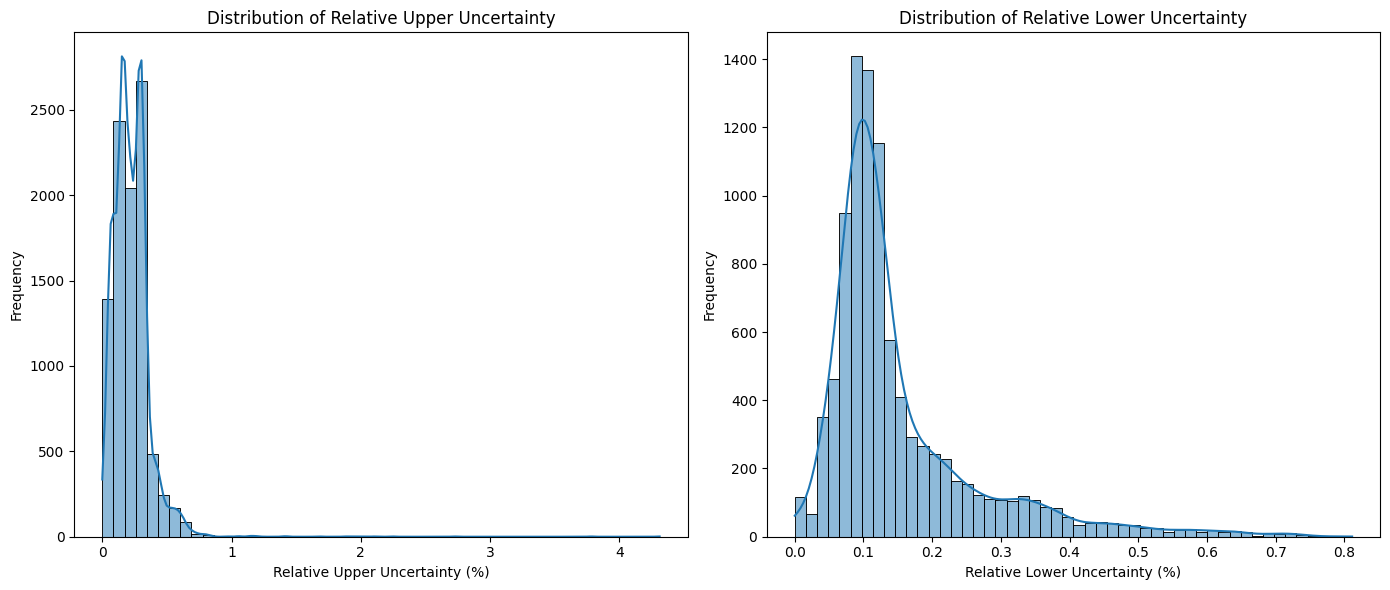

In [17]:
# Planetary Radius relative uncertainty histogram
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distributions of the relative upper and lower uncertainties
plt.figure(figsize=(14, 6))

# Relative Upper Uncertainty distribution
plt.subplot(1, 2, 1)
sns.histplot(exoplanet_df['RelativePlanetaryRadiusUpperUnc'], bins=50, kde=True)
plt.title('Distribution of Relative Upper Uncertainty')
plt.xlabel('Relative Upper Uncertainty (%)')
plt.ylabel('Frequency')

# Relative Lower Uncertainty distribution
plt.subplot(1, 2, 2)
sns.histplot(exoplanet_df['RelativePlanetaryRadiusLowerUnc'], bins=50, kde=True)
plt.title('Distribution of Relative Lower Uncertainty')
plt.xlabel('Relative Lower Uncertainty (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [18]:
relative_uncertainty_df.describe()

,"PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii",RelativePlanetaryRadiusUpperUnc,RelativePlanetaryRadiusLowerUnc
count,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000
mean,99.077250,17.007226,-31.781306,0.224973,0.154385
std,3018.723391,383.657088,1170.665177,0.148298,0.116619
min,0.080000,0.000000,-77180.000000,0.000000,0.000000
25%,1.430000,0.240000,-1.760000,0.137348,0.086788
50%,2.390000,0.520000,-0.300000,0.217097,0.114458
75%,13.112500,2.062500,-0.140000,0.297525,0.179488
max,200346.000000,21640.000000,0.000000,4.312500,0.811479


In [19]:
# Identify and count outliers with more than x relative upper uncertainty
high_rel_upper_unc_outliers = exoplanet_df[exoplanet_df['RelativePlanetaryRadiusUpperUnc'] > 0.75]  
high_rel_upper_unc_outliers_count = high_rel_upper_unc_outliers.shape[0]

# Display the count and the outliers
high_rel_upper_unc_outliers_count, high_rel_upper_unc_outliers[['KepID', 'PlanetaryRadius, Earthradii', 'PlanetaryRadiusUpperUnc, Earthradii', 'RelativePlanetaryRadiusUpperUnc']]

(33,
          KepID  PlanetaryRadius, Earthradii  \
 566    9775938                         4.18   
 585    9775938                         3.05   
 3678  10275077                         3.45   
 3909   5702637                       114.10   
 4000   8678691                         4.25   
 4199   6119923                         2.48   
 4418   9837828                        89.29   
 4703  10139390                         0.99   
 4816   7052511                         0.92   
 4854  11456279                         1.57   
 6293   4736439                         8.98   
 6460   6263468                         1.02   
 6543   9292100                         1.43   
 6660   8655076                         1.82   
 6668   9472341                         7.45   
 6691   8715564                         0.73   
 6699   9534832                         2.76   
 6755   8888745                         1.57   
 6769  10685764                         1.69   
 6776   7982917                    

In [20]:
#removing entries with relative uncertainty above 75% is pretty reasonable - there is only 33

exoplanet_df_cleaned = exoplanet_df[exoplanet_df['RelativePlanetaryRadiusUpperUnc'] <= 0.75]

# Check the shape of the dataframe before and after removal
original_shape = exoplanet_df.shape
cleaned_shape = exoplanet_df_cleaned.shape

original_shape, cleaned_shape

((9564, 49), (9531, 49))

In [21]:
# OrbitalPeriodUpperUnc, days

# 'OrbitalPeriodUpperUnc, days'
# 'OrbitalPeriodLowerUnc, days'

# Calculate the relative upper and lower uncertainties for the Orbital Period 
exoplanet_df_cleaned['RelativeOrbitalPeriodUpperUnc'] = exoplanet_df_cleaned['OrbitalPeriodUpperUnc, days'] / exoplanet_df_cleaned['OrbitalPeriod, days']
exoplanet_df_cleaned['RelativeOrbitalPeriodLowerUnc'] = abs(exoplanet_df_cleaned['OrbitalPeriodLowerUnc, days']) / exoplanet_df_cleaned['OrbitalPeriod, days']

# Display the DataFrame with new relative uncertainties for Orbital Period
exoplanet_df_cleaned[['OrbitalPeriod, days', 'OrbitalPeriodUpperUnc, days', 'OrbitalPeriodLowerUnc, days', 'RelativeOrbitalPeriodUpperUnc', 'RelativeOrbitalPeriodLowerUnc']].head()


/var/folders/x2/ws17zx3564g7xq9__ls_1nrr0000gn/T/ipykernel_3132/238078348.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exoplanet_df_cleaned['RelativeOrbitalPeriodUpperUnc'] = exoplanet_df_cleaned['OrbitalPeriodUpperUnc, days'] / exoplanet_df_cleaned['OrbitalPeriod, days']
/var/folders/x2/ws17zx3564g7xq9__ls_1nrr0000gn/T/ipykernel_3132/238078348.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exoplanet_df_cleaned['RelativeOrbitalPeriodLowerUnc'] = abs(exoplanet_df_cleaned['OrbitalPeriodLowerUnc, d

,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","OrbitalPeriodLowerUnc, days",RelativeOrbitalPeriodUpperUnc,RelativeOrbitalPeriodLowerUnc
0,9.488036,2.775000e-05,-2.775000e-05,2.924736e-06,2.924736e-06
1,54.418383,2.479000e-04,-2.479000e-04,4.555446e-06,4.555446e-06
2,19.899140,1.494000e-05,-1.494000e-05,7.507862e-07,7.507862e-07
3,1.736952,2.630000e-07,-2.630000e-07,1.514146e-07,1.514146e-07
4,2.525592,3.761000e-06,-3.761000e-06,1.489156e-06,1.489156e-06


In [22]:
def cap_at_percemtile(df, columnName, lower_percentile=0.10, upper_percentile=0.90):
    lower_bound = df[columnName].quantile(lower_percentile)
    upper_bound = df[columnName].quantile(upper_percentile)


    # Cap the outliers in the column at the upper and lower bounds determined by IQR
    df_capped = df.copy()
    df_capped[columnName] = df_capped[columnName].clip(lower=lower_bound, upper=upper_bound)

    return df_capped

In [23]:
def show_capped_stats(df, df_capped, columnName):
    stats_before = df[columnName].describe()
    stats_after = df_capped[columnName].describe()

    return stats_before, stats_after

In [24]:
# now lets look at the planetary raduis 
# we dont need to cap the bottom as the numbers dont go to 0 that close, and we cap the top 1% at 99% because 355x earths radius seems quite big already 
# and the std dropped quite well

column = 'PlanetaryRadius, Earthradii'
capped_df = cap_at_percemtile(exoplanet_df_cleaned, column , 0, 0.99)

show_capped_stats(exoplanet_df_cleaned, capped_df, column)

(count      9531.000000
 mean         99.384683
 std        3023.940513
 min           0.080000
 25%           1.430000
 50%           2.390000
 75%          13.255000
 max      200346.000000
 Name: PlanetaryRadius, Earthradii, dtype: float64,
 count    9531.000000
 mean       18.839239
 std        46.895624
 min         0.080000
 25%         1.430000
 50%         2.390000
 75%        13.255000
 max       355.766000
 Name: PlanetaryRadius, Earthradii, dtype: float64)

exoplanet_df_cleaned = capped_df

In [25]:
# And the orbital period itself 
# this also odoesnt go to 0 as close, even though it is pretty small compared to earth, so lets say bottom 5% is capped, 
# and then there are some extrem outliers in the top but not as many, so we cap only top 0,1%

column = 'OrbitalPeriod, days'
capped_df = cap_at_percemtile(exoplanet_df_cleaned, column , 0.05, 0.999)


show_capped_stats(exoplanet_df_cleaned, capped_df, column)

(count      9531.000000
 mean         75.491570
 std        1337.015375
 min           0.241843
 25%           2.723370
 50%           9.704338
 75%          40.274091
 max      129995.778400
 Name: OrbitalPeriod, days, dtype: float64,
 count    9531.000000
 mean       61.511862
 std       123.466620
 min         0.705854
 25%         2.723370
 50%         9.704338
 75%        40.274091
 max       893.060488
 Name: OrbitalPeriod, days, dtype: float64)

In [26]:
exoplanet_df_cleaned = capped_df

Since the relative uncertainties are small here we dont have to remove the entires or anything drastic, but we can replace the normal uncertanties with the relative

In [27]:


# we're going to cap the outliers at 'TransitSignal-to-Noise' at 15% and 85%

column = 'TransitSignal-to-Noise'
capped_df = cap_at_percemtile(exoplanet_df_cleaned, column , 0.15, 0.75)

show_capped_stats(exoplanet_df_cleaned, capped_df, column)


(count    9531.000000
 mean      251.713451
 std       783.098334
 min         0.000000
 25%        12.300000
 50%        23.000000
 75%        71.600000
 max      9054.700000
 Name: TransitSignal-to-Noise, dtype: float64,
 count    9531.000000
 mean       34.397723
 std        24.750616
 min         9.900000
 25%        12.300000
 50%        23.000000
 75%        71.600000
 max        71.600000
 Name: TransitSignal-to-Noise, dtype: float64)

In [28]:
exoplanet_df_cleaned = capped_df

In [ ]:
# step 2 finished export
exoplanet_df_cleaned.to_csv('./exports/step2.1.csv', index=False)

3. Choose appropriate machine learning algorithms for the classification task.

4. Train and validate your model, ensuring to avoid overfitting.

5. Evaluate the model's performance using relevant metrics.